In [ ]:
# ASSIGNMENT 3

## Titanic survival prediction

# Approach to the prediction
* 1.Import all libaray
* 2.Load and audit the data
* 3.Data prepration and Data Transformation
    * 1.Dealing with missing value
    * 2.Inconsistent value: Replace all transformation with consistent values
    * 3.Dealing With Outliers
* 4.Data visualization
* 5.Data analysis
    * 1.Uni-variate Analysis(Mean,Median,Mode,Skewness)
    * 2.Bi-variate Analysis(Correlation,Covariance,Chi-Square Test)
    * 3.Multi-Variate Analysis
        * 1.Regression:Not a regressiion
        * 2.Classification
            

# Importing the Libraries

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [49]:
!unzip titamic.zip

Archive:  titamic.zip
replace tested.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: tested.csv              


# Importing The Dataset

In [50]:
df=pd.read_csv("/content/tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [52]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [54]:
df.corr()

<ipython-input-54-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


In [55]:
df.skew()

<ipython-input-55-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


PassengerId    0.000000
Survived       0.568991
Pclass        -0.534170
Age            0.457361
SibSp          4.168337
Parch          4.654462
Fare           3.687213
dtype: float64

#Dropping the Unwanted columns

In [56]:
df.drop(['PassengerId'],axis=1,inplace=True)

In [57]:
df.drop(['Name'],axis=1,inplace=True)

In [58]:
df.drop(['Cabin'],axis=1,inplace=True)

In [59]:
df.drop(['Ticket'],axis=1,inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [61]:
df['Age']=np.where(df['Age'].isna(),df['Age'].median(skipna=True),df['Age'])
df['Fare']=np.where(df['Fare'].isna(),df['Fare'].median(skipna=True),df['Fare'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


<Axes: >

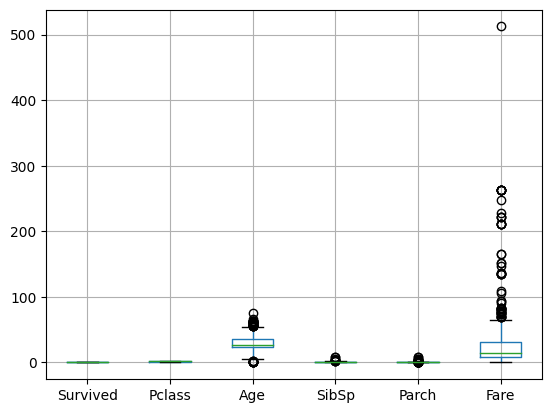

In [63]:
df.boxplot()

#Removing The Outliers

In [64]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [65]:
low_leadtime,high_leadtime=remove_outlier(df['Age'])
df['Age']=np.where(df['Age']>high_leadtime,high_leadtime,df['Age'])
df['Age']=np.where(df['Age']<low_leadtime,low_leadtime,df['Age'])

In [66]:
low_leadtime,high_leadtime=remove_outlier(df['SibSp'])
df['SibSp']=np.where(df['SibSp']>high_leadtime,high_leadtime,df['SibSp'])
df['SibSp']=np.where(df['SibSp']<low_leadtime,low_leadtime,df['SibSp'])

In [67]:
low_leadtime,high_leadtime=remove_outlier(df['Parch'])
df['Parch']=np.where(df['Parch']>high_leadtime,high_leadtime,df['Parch'])
df['Parch']=np.where(df['Parch']<low_leadtime,low_leadtime,df['Parch'])

In [68]:
low_leadtime,high_leadtime=remove_outlier(df['Fare'])
df['Fare']=np.where(df['Fare']>high_leadtime,high_leadtime,df['Fare'])
df['Fare']=np.where(df['Fare']<low_leadtime,low_leadtime,df['Fare'])

<Axes: >

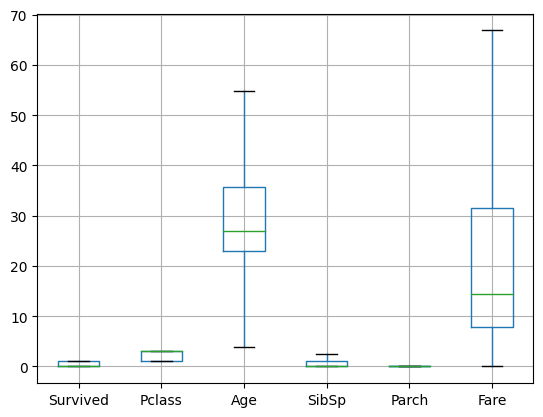

In [69]:
df.boxplot()

#Data Visualization

<Axes: ylabel='Pclass'>

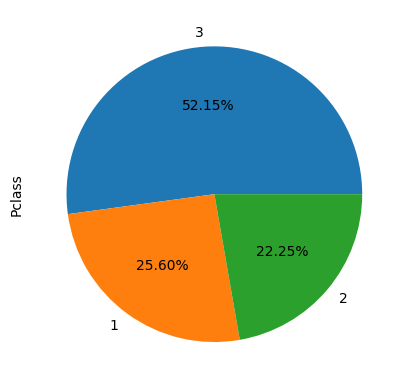

In [70]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%1.2f%%')

<Axes: ylabel='Survived'>

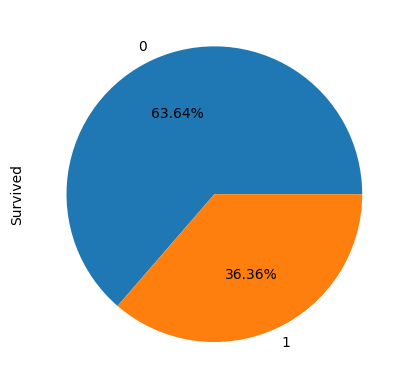

In [91]:
df['Survived'].value_counts().plot(kind='pie',autopct='%1.2f%%')

columns :  Survived


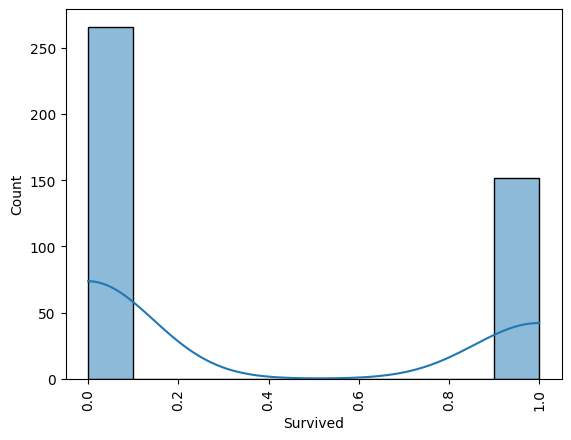

columns :  Pclass


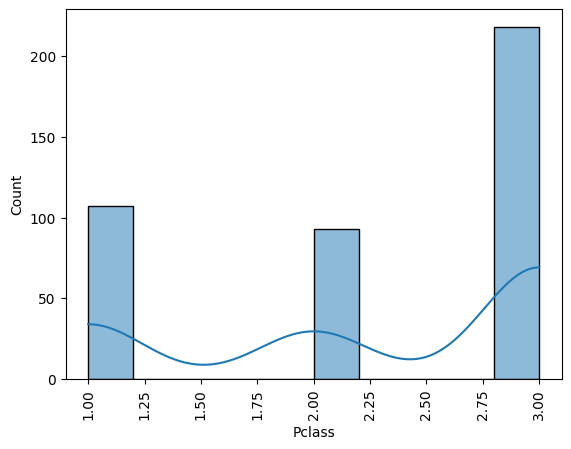

columns :  Sex


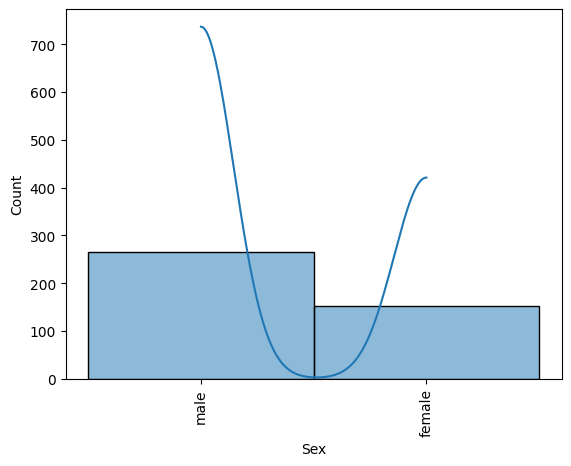

columns :  Age


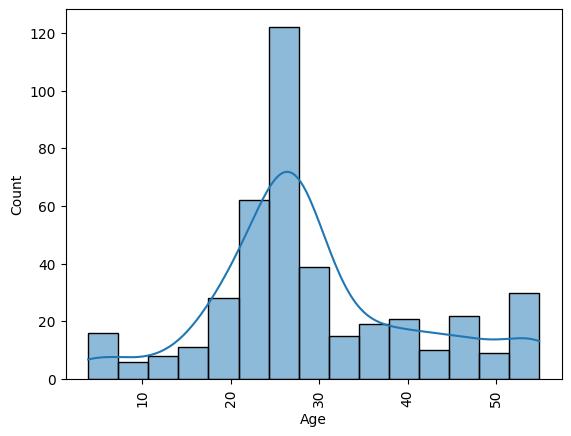

columns :  SibSp


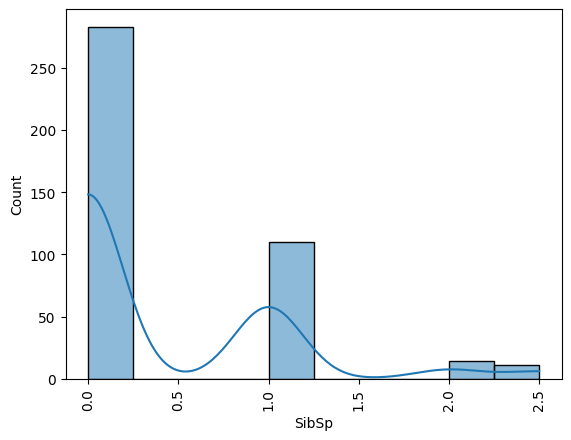

columns :  Parch


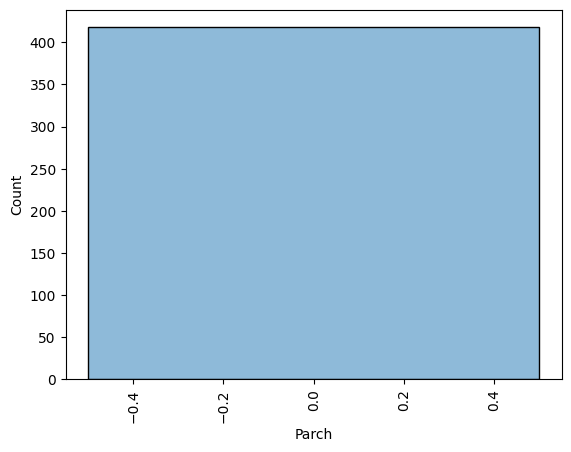

columns :  Fare


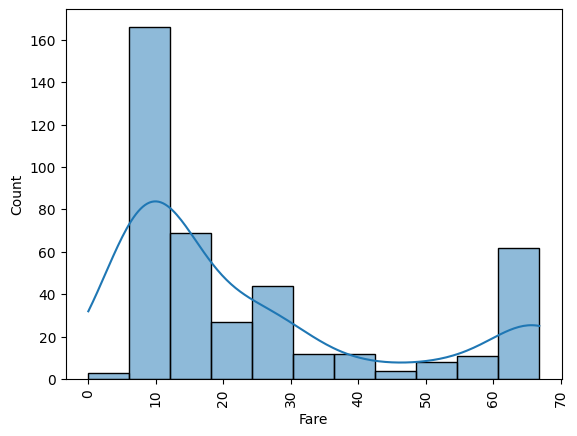

columns :  Embarked


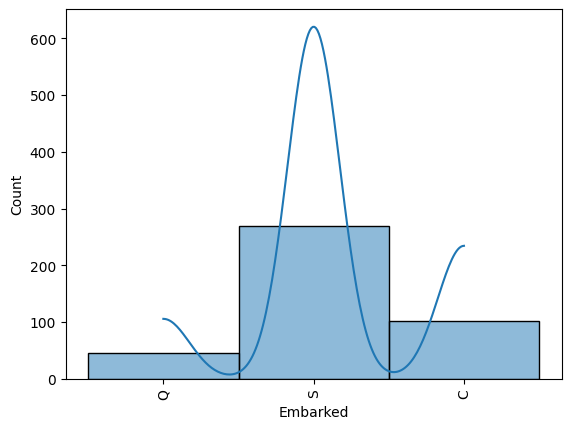

In [72]:
for i in df.columns:
    sns.histplot(df[i],kde=True)
    print('columns : ' , i )
    plt.xticks(rotation = 'vertical')
    plt.show()

Pclass  Survived
1       0           0.532710
        1           0.467290
2       0           0.677419
        1           0.322581
3       0           0.669725
        1           0.330275
Name: Survived, dtype: float64


<Axes: xlabel='Survived', ylabel='Age'>

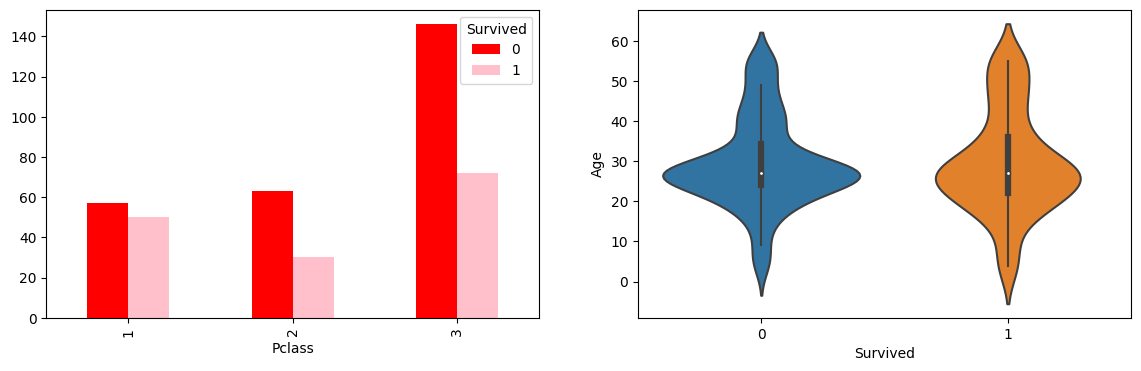

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(df.Pclass,df.Survived).plot(kind="bar",ax=ax1,color=("red","pink"))
s = df.groupby(['Pclass'])['Survived'].value_counts(normalize=True)
print(s)
sns.violinplot(
    x="Survived",
    y="Age",
    data=df,ax=ax2)

Sex     Survived
female  1           1.0
male    0           1.0
Name: Survived, dtype: float64


<Axes: xlabel='Pclass', ylabel='Sex'>

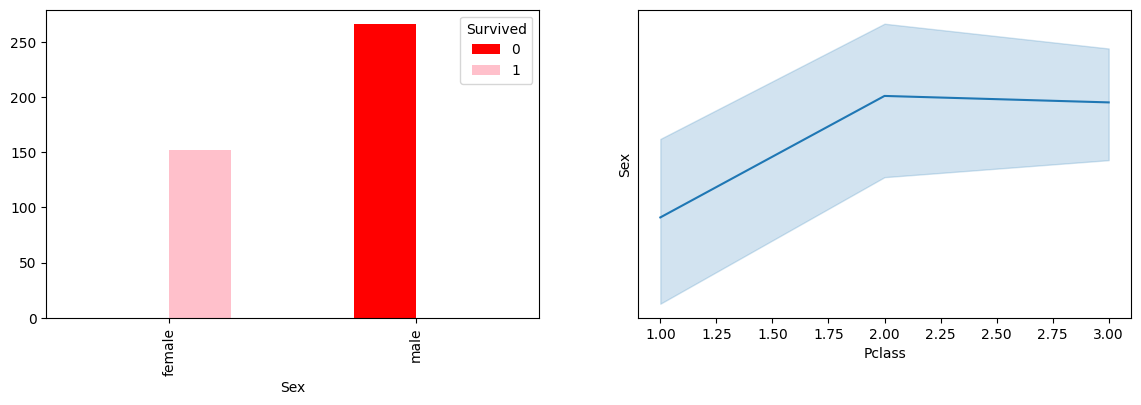

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(df.Sex,df.Survived).plot(kind="bar",ax=ax1,color=("red","pink"))
s = df.groupby(['Sex'])['Survived'].value_counts(normalize=True)
print(s)
sns.lineplot(
    y="Sex",
    x="Pclass",
    data=df,ax=ax2)

Sex     SibSp
female  0.0      0.578947
        1.0      0.355263
        2.0      0.039474
        2.5      0.026316
male    0.0      0.733083
        1.0      0.210526
        2.0      0.030075
        2.5      0.026316
Name: SibSp, dtype: float64


<Axes: xlabel='SibSp', ylabel='Survived'>

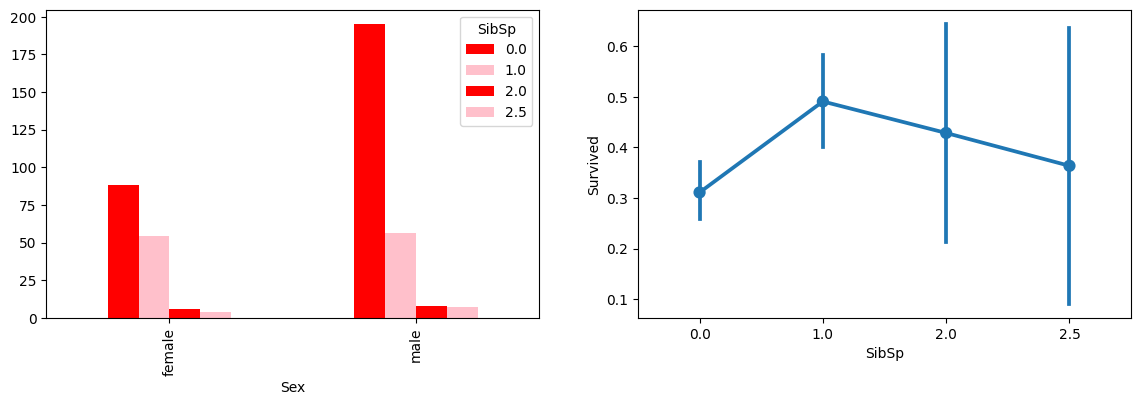

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(df.Sex,df.SibSp).plot(kind="bar",ax=ax1,color=("red","pink"))
s = df.groupby(['Sex'])['SibSp'].value_counts(normalize=True)
print(s)
sns.pointplot(
    y="Survived",
    x="SibSp",
    data=df,ax=ax2)

Fare       Sex   
0.000000   male      1.000000
3.170800   male      1.000000
6.437500   male      1.000000
6.495800   male      1.000000
6.950000   female    1.000000
                       ...   
63.358300  female    1.000000
65.000000  male      0.666667
           female    0.333333
66.835988  female    0.527273
           male      0.472727
Name: Sex, Length: 177, dtype: float64


<Axes: xlabel='Pclass', ylabel='Fare'>

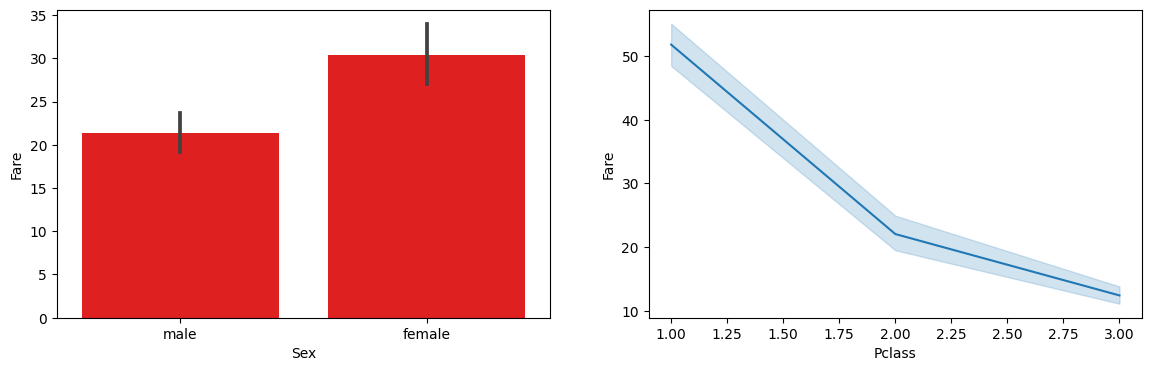

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sns.barplot(
    y="Fare",
    x="Sex",
    data=df,ax=ax1,color='red')
s = df.groupby(['Fare'])['Sex'].value_counts(normalize=True)
print(s)
sns.lineplot(
    y="Fare",
    x="Pclass",
    data=df,ax=ax2)

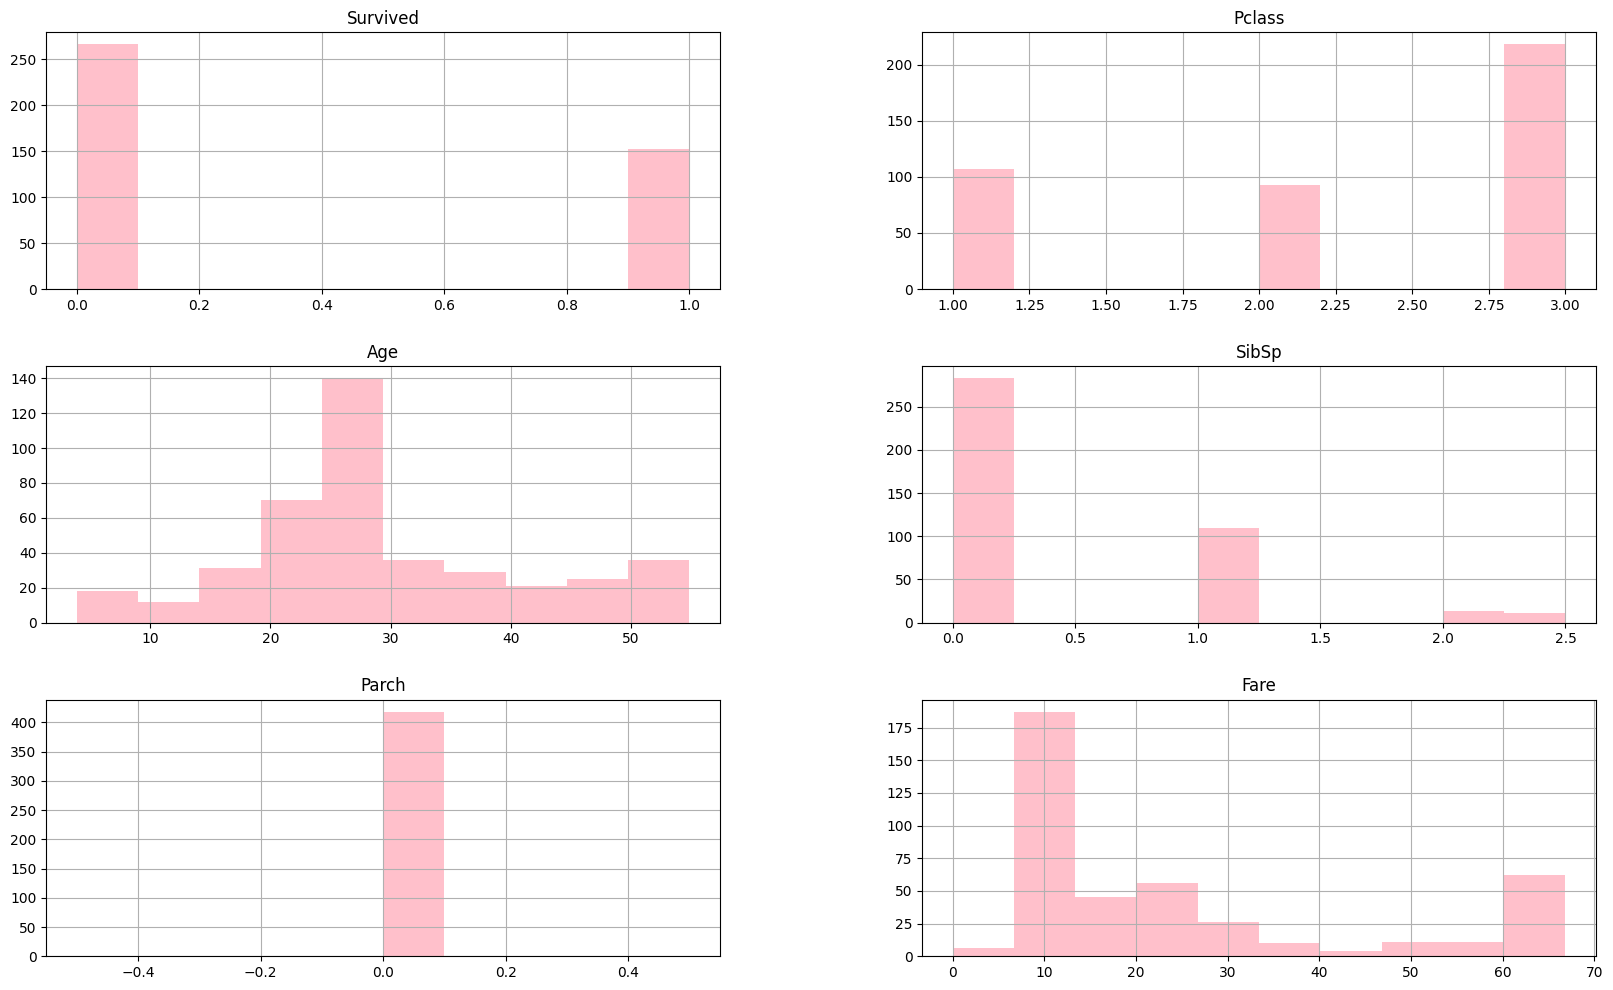

In [77]:
df.hist(figsize = (20,12),color='pink')
plt.show()

#Encoding The Data

In [78]:
def encode(data):
  le=LabelEncoder()
  for i in data.columns:
    if data[i].dtype=="object":
      data[i]=le.fit_transform(data[i])
  return data

In [79]:
encode(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.500,0.0,0.0,7.829200,1
1,1,3,0,47.000,1.0,0.0,7.000000,2
2,0,2,1,54.875,0.0,0.0,9.687500,1
3,0,3,1,27.000,0.0,0.0,8.662500,2
4,1,3,0,22.000,1.0,0.0,12.287500,2
...,...,...,...,...,...,...,...,...
413,0,3,1,27.000,0.0,0.0,8.050000,2
414,1,1,0,39.000,0.0,0.0,66.835988,0
415,0,3,1,38.500,0.0,0.0,7.250000,2
416,0,3,1,27.000,0.0,0.0,8.050000,2


#Train Test Split

In [80]:
x=df.drop(["Survived"],axis=1)
y=df['Survived']

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [82]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(334, 7)
(84, 7)
(84,)
(334,)


#LogisticRegression

In [83]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
preds_ytrain_lr=lr.predict(x_train)
preds_ytest_lr=lr.predict(x_test)

In [84]:
def acc_report(actual,predicted):
   acc_score=accuracy_score(actual,predicted)
   cn_matrix=confusion_matrix(actual,predicted)
   cla_report=classification_report(actual,predicted)
   print('accuracy::',acc_score.round(2))
   print(cn_matrix)
   print(cla_report)
acc_report(y_test,preds_ytest_lr)
print("::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::")
acc_report(y_train,preds_ytrain_lr)

accuracy:: 1.0
[[57  0]
 [ 0 27]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        27

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
accuracy:: 1.0
[[209   0]
 [  0 125]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       125

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334



#Decision tree classifier

In [85]:
dtc=DecisionTreeClassifier(max_depth=5,min_samples_split=4)
dtc.fit(x_train,y_train)
preds_ytrain_dtc=dtc.predict(x_train)
preds_ytest_dtc=dtc.predict(x_test)
acc_report(y_train,preds_ytrain_dtc)
acc_report(y_test,preds_ytest_dtc)

accuracy:: 1.0
[[209   0]
 [  0 125]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       125

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

accuracy:: 1.0
[[57  0]
 [ 0 27]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        27

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



#Random forest classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(verbose=1)
rf.fit(x_train,y_train)
preds_rf_train=rf.predict(x_train)
preds_rf_test=rf.predict(x_test)
acc_report(y_train,preds_rf_train)
acc_report(y_test,preds_rf_test)

accuracy:: 1.0
[[209   0]
 [  0 125]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       125

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

accuracy:: 1.0
[[57  0]
 [ 0 27]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        27

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


#Gradientboosting Classifier

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
preds_gb_train=gb.predict(x_train)
preds_gb_test=gb.predict(x_test)
acc_report(y_train,preds_gb_train)
acc_report(y_test,preds_gb_test)

accuracy:: 1.0
[[209   0]
 [  0 125]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       125

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

accuracy:: 1.0
[[57  0]
 [ 0 27]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        27

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



#KNeighbors Classifier

In [88]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train,y_train)
preds_ytrain_knn=knn.predict(x_train)
preds_ytest_knn=knn.predict(x_test)
acc_report(y_train,preds_ytrain_knn)
acc_report(y_test,preds_ytest_knn)

accuracy:: 0.68
[[183  26]
 [ 82  43]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       209
           1       0.62      0.34      0.44       125

    accuracy                           0.68       334
   macro avg       0.66      0.61      0.61       334
weighted avg       0.67      0.68      0.65       334

accuracy:: 0.73
[[48  9]
 [14 13]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.81        57
           1       0.59      0.48      0.53        27

    accuracy                           0.73        84
   macro avg       0.68      0.66      0.67        84
weighted avg       0.72      0.73      0.72        84



#Adaboost classifier

In [89]:
ada=AdaBoostClassifier(n_estimators=200,learning_rate=0.9623)
ada.fit(x_train,y_train)
preds_ada_train=ada.predict(x_train)
preds_ada_test=ada.predict(x_test)
acc_report(y_train,preds_ada_train)
acc_report(y_test,preds_ada_test)

accuracy:: 1.0
[[209   0]
 [  0 125]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       125

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

accuracy:: 1.0
[[57  0]
 [ 0 27]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        27

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

